<a href="https://colab.research.google.com/github/NOOYOUNG/DeepLearning/blob/main/Wine_logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Quality Samples
       7.4   0.7     0  1.9  0.076    11     34   0.9978  3.51  0.56   9.4  5  1
0      7.8  0.88  0.00  2.6  0.098  25.0   67.0  0.99680  3.20  0.68   9.8  5  1
1      7.8  0.76  0.04  2.3  0.092  15.0   54.0  0.99700  3.26  0.65   9.8  5  1
2     11.2  0.28  0.56  1.9  0.075  17.0   60.0  0.99800  3.16  0.58   9.8  6  1
3      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4  5  1
4      7.4  0.66  0.00  1.8  0.075  13.0   40.0  0.99780  3.51  0.56   9.4  5  1
...    ...   ...   ...  ...    ...   ...    ...      ...   ...   ...   ... .. ..
6491   6.2  0.21  0.29  1.6  0.039  24.0   92.0  0.99114  3.27  0.50  11.2  6  0
6492   6.6  0.32  0.36  8.0  0.047  57.0  168.0  0.99490  3.15  0.46   9.6  5  0
6493   6.5  0.24  0.19  1.2  0.041  30.0  111.0  0.99254  2.99  0.46   9.4  6  0
6494   5.5  0.29  0.30  1.1  0.022  20.0  110.0  0.98869  3.34  0.38  12.8  7  0
6495   6.0  0.21  0.38  0.8  0.020  22.0   98.0  0.98941  3.26  0.32  11.8  6  0

[6496 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

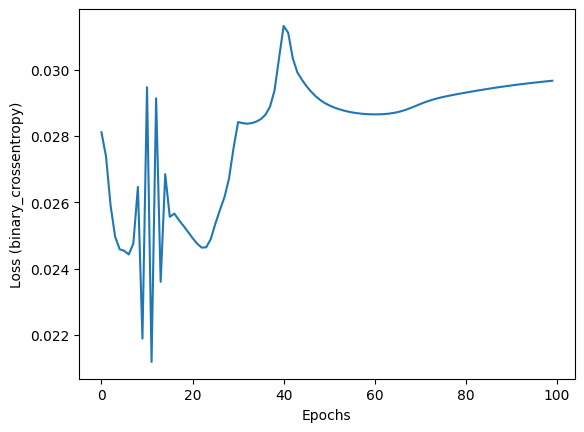

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers

df=pd.read_csv('/content/sample_data/wine.csv')

x_data=df.values[:, 0:12]
y_data=df.values[:,12]

print('Wine Quality Samples')
print(df)

model=Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(1, activation='sigmoid'))


sgd=optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd)

history=model.fit(x_data, y_data, epochs=100, batch_size=5, shuffle=False)

loss_and_metric=model.evaluate(x_data, y_data)
print('Evaluate:\n', loss_and_metric)

x_est0 = np.array([[7.1, 0.39, 0.35, 12.5, 0.044, 26, 72, 0.9941, 3.17, 0.29, 11.6, 5]])  # 2D 배열
x_est1 = np.array([[7.8, 0.58, 0.02, 2, 0.073, 9, 18, 0.9968, 3.36, 0.57, 9.5, 7]])  # 2D 배열
print('Predict of sample0 : %.f' % (model.predict([x_est0])[0][0]))
print('Predict of sample1 : %.f' % (model.predict([x_est1])[0][0]))

print('Model summary:\n')
model.summary()

plt.plot(history.history['loss'])
plt.ylabel('Loss (binary_crossentropy)')
plt.xlabel('Epochs')
plt.savefig('03_train_logistic_red_wine.png')
plt.show()
plt.clf()